## Предметный анализ данных

 ***Представьте, что вы устроились на работу в кадровое агентство, которое подбирает вакансии для IT-специалистов. Ваш первый проект — создание модели машинного обучения, которая будет рекомендовать вакансии клиентам агентства, претендующим на позицию Data Scientist. Сначала вам необходимо понять, что из себя представляют данные и насколько они соответствуют целям проекта. В литературе эта часть работы над ML-проектом называется Data Understanding, или анализ данных.***

In [43]:
#!pip install psycopg2 ## установка необходимого пакета для связки Питон и SQL


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import psycopg2       
import pandas as pd

# Создаём соединение с заданными параметрами:

#DBNAME = 'project_sql'                                    
#USER = 'skillfactory'
#PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
#HOST = '84.201.134.129'
#PORT = 5432

#Запрос:
#connection = psycopg2.connect(
   #dbname=DBNAME,
   #user=USER,
   #host=HOST,
   #password=PASSWORD,
   #port=PORT
#)


**3.1 Сколько вакансий есть в базе?**

In [ ]:
query3_1 = f'''select 
        count(id)                    --подсчет вакансий
           from public.VACANCIES'''
           
df = pd.read_sql_query(query3_1, connection) # используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма

display(f'Вакансий в базе: {int(pd.read_sql_query(query3_1, connection).iloc[0])}')

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\3044305493.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\3044305493.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\3044305493.py:7: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



'Вакансий в базе: 49197'

***Дополнительно**.Посмотрим топ-10 вакансий.*

In [ ]:
query3_1 = f'''select
        distinct(v.name), 
        count(v.id)                    --подсчет вакансий
           from public.VACANCIES v
         group by 1                    
         order by 2 desc 
         limit 10
           '''
           
df = pd.read_sql_query(query3_1, connection)
df

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\1509081648.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,count
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
5,Аналитик,404
6,Инженер-программист,389
7,Программист 1C,360
8,Frontend-разработчик,242
9,Инженер технической поддержки,230


*Очевидно, что в топе ИТ-направленность, а также аналитика. Если грубо обобщить это сис.админы,программисты и различные аналитики*

**Дополнительно**. Посмотрим Топ5 сфер для вакансий*

In [ ]:
queryd2 = f'''select
        distinct(i.name) as industry,
        count(v.id)                             
           from public.VACANCIES v                                   -- присоединим к вакансиям основные таблицы, по ключам
           join public.employers e on e.id = v.employer_id 
           join public.employers_industries ei on e.id = ei.employer_id
           join public.industries i on ei.industry_id = i.id

           group by 1
           order by 2 desc                                          -- сортировка по убыванию
           limit 5
        '''
df = pd.read_sql_query(queryd2, connection)
df

C:\Users\DS\AppData\Local\Temp\ipykernel_14872\55316905.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(queryd2, connection)


,industry,count
0,Разработка программного обеспечения,12499
1,"Системная интеграция, автоматизации технологи...",11034
2,"Интернет-компания (поисковики, платежные систе...",6413
3,Банк,2742
4,Мобильная связь,1585


*Много вакансий по разработке ПО и системной интеграции, что в принципе понятно было из топа-профессий*

**3.2 Сколько работодателей?**

In [ ]:
query3_2 = f'''select 
        count( id)                     --подсчет работодателей из базы работодателей
           from public.EMPLOYERS
           
           '''
df = pd.read_sql_query(query3_2, connection)
df
display(f'Работодателей в базе: {int(pd.read_sql_query(query3_2, connection).iloc[0])}')
           

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2812804363.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2812804363.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2812804363.py:8: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



'Работодателей в базе: 23501'

**3.3 Сколько регионов?**

In [ ]:
query3_3 = f'''select 
        count( id)                               --подсчет регионов из базы регионы
           from public.AREAS
           '''
df = pd.read_sql_query(query3_3, connection)
df
display(f'Регионов в базе: {int(pd.read_sql_query(query3_3, connection).iloc[0])}')


C:\Users\DS\AppData\Local\Temp\ipykernel_14508\1356751457.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\1356751457.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\1356751457.py:7: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



'Регионов в базе: 1362'

**3.4 Сколько сфер деятельности?**

In [ ]:
query3_4 = f'''select 
        count( id)                      --подсчет сфер деятельности из базы сферы деятельности
           from public.INDUSTRIES         
           '''
df = pd.read_sql_query(query3_4, connection)
df
display(f'Сфер деятельности в базе: {int(pd.read_sql_query(query3_4, connection).iloc[0])}')


C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2631673250.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2631673250.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2631673250.py:7: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



'Сфер деятельности в базе: 294'

**Дополнительно**. Посмотрим на топ 5 областей для вакансий*

In [ ]:
queryd2 = f'''select
        i.name as industry,
        count(v.id)                             
           from public.VACANCIES v
           join public.employers e on e.id = v.employer_id
           join public.employers_industries ei on e.id = ei.employer_id
           join public.industries i on ei.industry_id = i.id
           group by 1
           order by 2 desc
           limit 5
        '''
df = pd.read_sql_query(queryd2, connection)
df

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2922189381.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,industry,count
0,Разработка программного обеспечения,12499
1,"Системная интеграция, автоматизации технологи...",11034
2,"Интернет-компания (поисковики, платежные систе...",6413
3,Банк,2742
4,Мобильная связь,1585


*А вот так увидим, что не все работодатели указывают сферу деятельности.*

In [ ]:
queryd2 = f'''select
        i.name as industry,
        count(v.id)                             
           from public.VACANCIES v
           left join public.employers e on e.id = v.employer_id
           left join public.employers_industries ei on e.id = ei.employer_id
           left join public.industries i on ei.industry_id = i.id
           group by 1
           order by 2 desc
           limit 5
        '''
df = pd.read_sql_query(queryd2, connection)
df

C:\Users\DS\AppData\Local\Temp\ipykernel_14872\3889525944.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(queryd2, connection)


,industry,count
0,Разработка программного обеспечения,12499
1,"Системная интеграция, автоматизации технологи...",11034
2,None,10084
3,"Интернет-компания (поисковики, платежные систе...",6413
4,Банк,2742


**Вывод**


 **Вакансий в базе: 49197**;
**Работодателей в базе: 23501**;
**Регионов в базе: 1362**;
**Сфер деятельности в базе: 294**.
**База большая, огромное количество вакансий в сфере разработки программного обеспечения (кадровый голод).Требуются также сис.админы и аналитики. Многие работодатели не указывают свою сферу деятельности, возможно это связано с тем, что сфер много**

## Детальный анализ вакансий

**4.1 Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).**

In [ ]:
query4_1 = f'''select 
        a.name area,                        -- вывести количество вакансий, сгруппированного по регионам
        count(v.id)         
           from public.AREAS a
        join VACANCIES v on v.area_id = a.id
        group by area
        order by count desc               -- сортировка по убыванию
        limit 5                           -- только первая пятерка
        '''
display(f'Вакансий в ТОП-5 регионов:')
df = pd.read_sql_query(query4_1, connection)
display(f'Вакансий в ТОП-5 регионов:')
df

'Вакансий в ТОП-5 регионов:'

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\1755568493.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



'Вакансий в ТОП-5 регионов:'

,area,count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


**4.2 Посмотрим на зарплаты. У какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой?**

In [70]:
query4_2 = f'''select 
        count(v.id)                               --подсчитали количество вакансий
           from public.VACANCIES v
           where v.salary_from is not null or v.salary_to is not null        --где зарплата от или до не ноль
        '''
df = pd.read_sql_query(query4_2, connection)
display(f'Количество искомых вакансий: {int(pd.read_sql_query(query4_2, connection).iloc[0])}')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2511846129.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2511846129.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2511846129.py:7: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



'Количество искомых вакансий: 24073'

,count
0,24073


*Что можно сказать по нулям в зарплате? Их слишком много... Проведем небольшой дополнительный анализ.*

In [105]:
queryd = f'''select 
        count(v.id)                               --подсчитали количество вакансий
           from public.VACANCIES v
           
           where v.salary_from is  null and v.salary_to is null
           
        '''
df = pd.read_sql_query(queryd, connection)
display(f'Количество вакансий без указания зарплаты: {(int(pd.read_sql_query(queryd, connection).iloc[0]))}')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\3342443841.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\3342443841.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\3342443841.py:9: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



'Количество вакансий без указания зарплаты: 25124'

,count
0,25124


*Проверим по городам*

In [106]:
query= f'''select 
        a.name area,                        -- вывести количество вакансий, сгруппированного по регионам
        count(v.id)         
           from public.AREAS a
        join VACANCIES v on v.area_id = a.id
        where v.salary_from is null and v.salary_to is null
        group by area
        order by count desc               -- сортировка по убыванию
        limit 5                           -- только первая пятерка
        '''
df = pd.read_sql_query(query, connection)
display(f'Не указана зарплата в топ-5 регионов:')
df




C:\Users\DS\AppData\Local\Temp\ipykernel_14508\3422463238.py:11: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



'Не указана зарплата в топ-5 регионов:'

,area,count
0,Москва,3741
1,Санкт-Петербург,1648
2,Минск,1606
3,Алматы,1249
4,Новосибирск,1077


*Ожидаемо. Лидируют,конечно,Москва и Санкт-Петербург.*

*Проверим по работодателям*

In [9]:
query4_2 = f'''select
        distinct(e.name),
        count(v.id)                             
           from public.VACANCIES v
           join public.employers e on e.id = v.employer_id    -- привязка вакансий к работодателям
           where v.salary_from is  null and v.salary_to is null  -- условие нули в зарплатах от И до
           group by 1
           order by 2 desc
           limit 5
        '''
df = pd.read_sql_query(query4_2, connection)
df


C:\Users\DS\AppData\Local\Temp\ipykernel_14872\306303895.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query4_2, connection)


,name,count
0,Яндекс,438
1,Тинькофф,437
2,СБЕР,397
3,Газпром нефть,329
4,ИК СИБИНТЕК,259


*Видим,много крупных организаций ИТ,банки,нефть не указывают зарплату*

*А если посмотреть по сферам деятельности?*

In [111]:
queryd2 = f'''select
        i.name as industry,
        count(v.id)                             
           from public.VACANCIES v                        
           join public.employers e on e.id = v.employer_id
           join public.employers_industries ei on e.id = ei.employer_id
           join public.industries i on ei.industry_id = i.id
           where v.salary_from is  null and v.salary_to is null 
           group by 1
           order by 2 desc
           limit 5
        '''
df = pd.read_sql_query(queryd2, connection)
df

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\3300345458.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,industry,count
0,Разработка программного обеспечения,7927
1,"Системная интеграция, автоматизации технологи...",6892
2,"Интернет-компания (поисковики, платежные систе...",3026
3,Банк,2348
4,Мобильная связь,843


*Вывод какой? Та же тенденция по неуказанной зарплате, что и в целом по вакансиям*

**4.3 Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого числа.**

In [72]:
query = f'''select 
        ROUND(AVG (salary_from)) s_f, --округлили средние значения
        ROUND(AVG (salary_to)) s_t
           from public.VACANCIES   
        '''
df = pd.read_sql_query(query, connection)
display('Cредние значения для нижней и верхней границы зарплатной вилки')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\952922622.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



'Cредние значения для нижней и верхней границы зарплатной вилки'

,s_f,s_t
0,71065.0,110537.0


*Интересно, а где самые высокие зарплаты?*

In [10]:
query = f'''select 
        distinct(a.name),
        ROUND(AVG (v.salary_to)) s_t
        
           from public.VACANCIES v
           join areas a  on v.area_id = a.id        --присоединяем таблицу с локациями
           group by 1
           having ROUND(AVG (v.salary_to)) is not null  -- условие что зарплата не равна нулю
           order by 2 desc                             -- сортировка по убыванию
           limit 10                                    -- первая десятка
           
        '''
df = pd.read_sql_query(query, connection)
display('Максимальная средняя зарплата')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_14872\2228644825.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


'Максимальная средняя зарплата'

,name,s_t
0,Германия,557232.0
1,Кутаиси,350691.0
2,Болгария,341015.0
3,Черногория,306855.0
4,Кинешма,300000.0
5,Польша,298061.0
6,Дзержинск (Беларусь),268860.0
7,Кипр,264669.0
8,Сербия,263018.0
9,Турция,259901.0


*Видим,что за рубежом зарплаты выше*

**4.4 Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Какая пара находится на втором месте по популярности?**

In [73]:
query = f'''select 
        count(v.id),        -- количество вакансий с расписанием и графиком
        v.schedule,
        v.employment
           from public.VACANCIES v
        group by 2,3        -- группировка по 1 и 2 клонкам
        order by 1 desc     -- сортировка по убыванию
        limit 5             -- только первая пятерка
        '''
df = pd.read_sql_query(query, connection)
display('На втором месте :')
df.iloc[1]


C:\Users\DS\AppData\Local\Temp\ipykernel_14508\1314190511.py:10: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



'На втором месте :'

count                     7802
schedule      Удаленная работа
employment    Полная занятость
Name: 1, dtype: object

**4.5 Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.**

In [74]:
query = f'''select             -- вывести подсчет вакансий и опыт
        count(v.id),    
        v.experience
           from public.VACANCIES v
        group by 2             -- сгруппировать по опыту 
        order by 1 desc        -- сортировать по количеству
        limit 5
        '''
df = pd.read_sql_query(query, connection)
display('Требуемый опыт работы в порядке убывания количества вакансий')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\479068366.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



'Требуемый опыт работы в порядке убывания количества вакансий'

,count,experience
0,26152,От 1 года до 3 лет
1,14511,От 3 до 6 лет
2,7197,Нет опыта
3,1337,Более 6 лет



**Очевидно, что самое большое количество вакансий в самых больших городах типа Москвы и Санкт-Петербурга. Большая часть в России. Совершенно ничего неожиданного. Средние значения  зарплаты в общем, согласно данных,  от 71 тысячи до 110 тысяч. Большую зарплату дают немцы. Да и заграницей в целом. Но не все работодатели в принципе заполняют это поле. Какие могут быть причины? Возможно, это связано с тем, что работодатель хочет сориентироваться на собеседовании или чтобы не видели конкуренты? Может это связано с серыми зарплатами? Я думаю, что здесь самый основной момент в том, о какой компании идет речь. Согласно анализа, зарплату в вакансиях не указывают такие гиганты как Яндекс, Сбер, Газпром. На мой взгляд дело в системе грейдов. В данных организациях одна и та же должность и одни и те же обязанности могут оплачиваться очень сильно по-разному. Сильно влияют будущие выгоды от длительной работы у них, всю эту систему они раскрывать в обьявлениях не имеют права, но и писать чисто оклад без всех этих моментов было бы неправильно. Этот момент снижает эффективность анализа. Также не все работодатели указывают сферы деятельности, видимо, просто этих сфер много**
**Мы также выяснили, что наибольшее количество вакансий предполагает полный рабочий день и полную занятость, но также много сотрудников требуется и на удаленку, это вторая пара по полулярности. Также отметим, что наибольшее количество сотрудников требуется с опытом от 1 до 3 лет. Могу предположить, что эти люди уже не 'зеленые новчики', но при этом не стоят как специалисты уровня 'сеньор'. Это 'свежие' специалисты из вузов, которые уже имеют некий опыт.**

## Анализ работодателей

**5.1 Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.**

In [ ]:
query = f'''select 
        count(v.id),
        e.name
           from public.VACANCIES v
        join public.employers e on e.id  = v.employer_id
        group by 2
        order by 1 desc
        limit 5
        '''
df = pd.read_sql_query(query, connection)
display(f'На первом месте: {df.iloc[0][0]}')
display(f'На пятом месте: {df.iloc[4][0]}')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_888\1704548323.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
C:\Users\DS\AppData\Local\Temp\ipykernel_888\1704548323.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'На первом месте: {df.iloc[0][0]}')


'На первом месте: 1933'

C:\Users\DS\AppData\Local\Temp\ipykernel_888\1704548323.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'На пятом месте: {df.iloc[4][0]}')


'На пятом месте: 331'

,count,name
0,1933,Яндекс
1,491,Ростелеком
2,444,Тинькофф
3,428,СБЕР
4,331,Газпром нефть


**5.2 Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.**

Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей. Впишите его название в поле ниже в том виде, который вернул запрос.


In [17]:
query = f'''select 
    areas.name, COUNT(DISTINCT employers.id) AS employers_count  --- вывести локации и количество работодателей
FROM areas
left JOIN employers ON employers.area = areas.id               -- присоединить к работодателям локации
LEFT JOIN VACANCIES v ON v.area_id = employers.area            -- туда же присоединить также вакансии
WHERE v.id is null                                             -- где ид вакансии не ноль
GROUP BY areas.name                                            -- сгруппировать по локациям
order by employers_count desc                                  -- сортировать по количеству


'''
df = pd.read_sql_query(query, connection)
display(f'Больше всего работодателей: {df.iloc[0][0]}')
df


C:\Users\DS\AppData\Local\Temp\ipykernel_17040\4244238570.py:12: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\DS\AppData\Local\Temp\ipykernel_17040\4244238570.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



'Больше всего работодателей: Россия'

,name,employers_count
0,Россия,410
1,Казахстан,207
2,Московская область,75
3,Краснодарский край,19
4,Беларусь,18
...,...,...
889,Жабинка,0
890,Железногорск-Илимский,0
891,Жетысай,0
892,Жигалово,0


**5.3 Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии.**

Выберите максимальное значение из получившегося списка.

In [ ]:
query = f'''select 
   distinct e.name,
   count(distinct area_id)                                    -- подсчет локаций
   from public.vacancies v
   join employers e on v.employer_id = e.id                   -- присоединение таблицы с сотрудниками
   group by e.name
   order by 2 desc

'''
df = pd.read_sql_query(query, connection)
display(f'Выборка работодателей по регионам: {df.iloc[0][0]}')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_888\2882763154.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
C:\Users\DS\AppData\Local\Temp\ipykernel_888\2882763154.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Выборка работодателей по регионам: {df.iloc[0][0]}')


'Выборка работодателей по регионам: Яндекс'

,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,Яроцкий Е. В./ MoonX,1
14762,Ясли-сад №374 г. Минска,1
14763,ЯСП,1
14764,Ястро-Переработка,1


**5.4 Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.**

Введите количество, которое вернул запрос, в поле ниже.

In [ ]:
query = f'''select 
    count(distinct e.id)
FROM public.employers e
left JOIN employers_industries i on i.employer_id = e.id          -- присоединить к работодателям их сферы деятельности
where i.industry_id is null                                       -- выделить где сфера деятельности - ноль


'''
df = pd.read_sql_query(query, connection)
display(f'Количество работодателей, не указавших сферу деятельности: {df.iloc[0][0]}')
df


C:\Users\DS\AppData\Local\Temp\ipykernel_5764\3851285346.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
C:\Users\DS\AppData\Local\Temp\ipykernel_5764\3851285346.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Количество работодателей, не указавших сферу деятельности: {df.iloc[0][0]}')


'Количество работодателей, не указавших сферу деятельности: 8419'

,count
0,8419


**5.5Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.**

Введите в поле ниже название этой компании так же, как оно указано в результате запроса.

In [ ]:
query = f'''select 
    e.name,
    count(distinct i.industry_id)
FROM public.employers e
full outer join employers_industries i on i.employer_id = e.id  -- полное присоединение с указанием всех значений работодатели и сферы

group by 1
having count(distinct i.industry_id)=4                          --где число сфер равно 4
order by 1



'''
df = pd.read_sql_query(query, connection)
display(f'На третьем месте: {df.iloc[2][0]}')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_5764\2681552296.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
C:\Users\DS\AppData\Local\Temp\ipykernel_5764\2681552296.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'На третьем месте: {df.iloc[2][0]}')


'На третьем месте: 2ГИС'

,name,count
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4
...,...,...
1127,ЮРИОН,4
1128,ЮТИП Технологии,4
1129,ЯКласс,4
1130,ЯрНео,4


**5.6 С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».**

In [ ]:
query = f'''select 
    count(*)  
FROM public.employers e

full outer join employers_industries i on i.employer_id = e.id     -- полное присоединение
join industries ii on ii.id = i.industry_id

where ii.name = 'Разработка программного обеспечения'              -- условие разработка программного обеспечения

order by 1                                                        -- сортировка по 1 столбцу
'''
df = pd.read_sql_query(query, connection)
display(f'Количество работодателей, указавших разработку в качестве сферы деятельности: {df.iloc[0][0]}')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_5764\3886594437.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
C:\Users\DS\AppData\Local\Temp\ipykernel_5764\3886594437.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Количество работодателей, указавших разработку в качестве сферы деятельности: {df.iloc[0][0]}')


'Количество работодателей, указавших разработку в качестве сферы деятельности: 3553'

,count
0,3553


**5.7 Для компании «Яндекс» выведите список регионов-миллионников , в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании, собранных в этой таблице. Должна получиться выборка такого вида (приведён пример результата для компании SberTech):**

In [ ]:
# 1 способ

import requests                                          #импорт нужных библиотек
from bs4 import BeautifulSoup
import pandas as pd
import psycopg2  

# Step 1: Scrape the city names from Wikipedia
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер

tabl = page.find("table", class_="standard")
town = []
tt = tabl.find("tbody")  # в таблице выбираем тело таблицы
qq = tt.find_all("tr")   # в теле таблицы выбираем все ряды

for ss in qq:
    link = ss.find("a")  # в каждом ряде находим тег "а"
    if link:  
        town.append(link.text)  # если линк не нан, добавляем

# Список городов для нашего запроса
town_list = ', '.join([f"'{city}'" for city in town])  # в формат sql, чтобы не было ошибки
print(town_list)

# Наш SQL запрос
query = f'''
SELECT 
    a.name,
    COUNT(v.id) AS cc
FROM public.vacancies v  
INNER JOIN areas a ON v.area_id = a.id                    --присоединение локаций
INNER JOIN employers e ON e.id = v.employer_id            -- присоединение работодателей
WHERE e.name = 'Яндекс' AND a.name IN ({town_list})       -- условие Яндекс и то, что в нашем добытом списке
GROUP BY a.name
UNION ALL                                                 -- вывод суммы
SELECT 'total', SUM(1)                                    -- вывести сумму по 1 колонке  и слово total
FROM public.vacancies v
JOIN areas a ON v.area_id = a.id                          
JOIN employers e ON e.id = v.employer_id 
WHERE e.name = 'Яндекс' AND a.name IN ({town_list})
'''

df = pd.read_sql_query(query, connection)

print(df)

['[2]', 'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']
'[2]', 'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'


C:\Users\DS\AppData\Local\Temp\ipykernel_5764\1570968743.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


               name   cc
0             total  485
1         Волгоград   24
2           Воронеж   32
3      Екатеринбург   39
4            Казань   25
5         Краснодар   30
6        Красноярск   23
7            Москва   54
8   Нижний Новгород   36
9       Новосибирск   35
10             Омск   21
11            Пермь   25
12   Ростов-на-Дону   25
13           Самара   26
14  Санкт-Петербург   42
15              Уфа   26
16        Челябинск   22


In [ ]:
### 2 способ

import urllib.parse as req
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
mln_cities = tuple(pd.read_html(url)[0]['Город'])


query = f'''select
a.name,
count(v.id) count
from public.vacancies v  
inner join areas a on v.area_id = a.id 
inner join employers e on e.id = v.employer_id 
where e.name = 'Яндекс' and a.name in {mln_cities}
group by 1

UNION ALL

select 
'total', sum(count)
from
(select
a.name,
count(v.id) count
from public.vacancies v  
inner join areas a on v.area_id = a.id 
inner join employers e on e.id = v.employer_id 
where e.name = 'Яндекс' and a.name in {mln_cities}
group by 1) sub1

'''

df = pd.read_sql_query(query, connection)
df

C:\Users\DS\AppData\Local\Temp\ipykernel_888\3803635372.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name,count
0,Волгоград,24.0
1,Воронеж,32.0
2,Екатеринбург,39.0
3,Казань,25.0
4,Краснодар,30.0
5,Красноярск,23.0
6,Москва,54.0
7,Нижний Новгород,36.0
8,Новосибирск,35.0
9,Омск,21.0


**В ходе исследования мы узнали о ТОП-5 работодателях по количеству вакансий, это IT и нефтегазовое направление (Яндекс - Газпром нефть). Детально разобран Яндекс, у которого очень много вакансий по разным сферам в разных регионах.Выявлен регион, где заявлены работодатели, но нет вакансий, с учетом, что это оказалась страна (Россия) логично предположить, что работодатели более точно указывают регион с вакансиями, так выявлено, что есть работодатели, которые указываеют вакансии в большом количестве регионов, максимум 181! Видимо, для графы 'работодатель' указывается просто 'Россия'.Выявлено, что 1/3 работодателей не указывает свою сферу деятельности, это не может быть связано с тем, что у работодателя несколько сфер, т.к. присутствуют работодатели, указавшие несколько сфер.. Ожидаемо опять много разработки ПО, уже все выводы на эту тему сделала**

## Предметный анализ

 **6.1 Сколько вакансий имеет отношение к данным?**

In [ ]:
query = f'''select 
count (v.id)
from public.vacancies v
where lower(v.name) like '%data%' or lower(v.name) like '%данн%' -- условие вхождения искомых слов в текст вакансии
'''
df = pd.read_sql_query(query, connection)
display(f'Вакансий, имеющих отношение к данным {df.iloc[0][0]}')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_5764\2037609415.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
C:\Users\DS\AppData\Local\Temp\ipykernel_5764\2037609415.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Вакансий, имеющих отношение к данным {df.iloc[0][0]}')


'Вакансий, имеющих отношение к данным 1771'

,count
0,1771


**6.2 Сколько есть подходящих вакансий для начинающего дата-сайентиста?**

In [ ]:
query = f'''select 
count (v.name)
from public.vacancies v
where (
(lower(v.name) like '%data scientist%')         -- условия, которые нужны для идентификации вакансии как вакансии для DS
or (lower(v.name) like '%data science%') 
or (lower(v.name) like '%исследователь данных%') 
or ((v.name like '%ML%' and v.name not like '%HTML%'))
or (lower(v.name) like '%machine learning%')
or (lower(v.name) like '%машинн%обучен%%')
AND (v.key_skills IS NOT NULL)
)
    AND ((v.name ILIKE '%junior%')           -- условия чтобы выделить вакансии без опыта
    OR (v.experience LIKE '%Нет опыта%')
    OR (v.employment LIKE '%Стажировка%'))

'''
df = pd.read_sql_query(query, connection)
display(f'Вакансий, подходящих для дата-сайнтиста {df.iloc[0][0]}')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_5764\3235217628.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
C:\Users\DS\AppData\Local\Temp\ipykernel_5764\3235217628.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Вакансий, подходящих для дата-сайнтиста {df.iloc[0][0]}')


'Вакансий, подходящих для дата-сайнтиста 51'

,count
0,51


**6.3 Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?**

In [ ]:
query6 = f'''SELECT count(vacancies.name) as n_vac
                FROM vacancies
                WHERE (lower(vacancies.name) LIKE '%data scientist%' 
                or lower(vacancies.name) ILIKE '%data science%' 
                or lower(vacancies.name) ILIKE '%исследователь данных%' 
                or lower(vacancies.name) ILIKE '%ml%' and vacancies.name NOT LIKE '%HTML%' and vacancies.name not Ilike '%QML%' 
                or lower(vacancies.name) ILIKE '%machine learning%' 
                or lower(vacancies.name) ILIKE '%машинн%обучен%') 
                and(lower(vacancies.key_skills) ILIKE '%postgres%'         -- добавление к верхнему запросу условия по sql
                or lower(vacancies.key_skills) ILIKE '%sql%')
             '''
df = pd.read_sql_query(query6, connection)
display(f'Вакансий, с требованием знания sql {df.iloc[0][0]}')
df
             

C:\Users\DS\AppData\Local\Temp\ipykernel_5764\1594112782.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query6, connection)
C:\Users\DS\AppData\Local\Temp\ipykernel_5764\1594112782.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Вакансий, с требованием знания sql {df.iloc[0][0]}')


'Вакансий, с требованием знания sql 229'

,n_vac
0,229


**6.4 С помощью запроса, аналогичного предыдущему, проверьте, насколько популярен Python в требованиях работодателей к DS. Вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.**

In [ ]:
query=f'''SELECT count(vacancies.name) as n_vac
                FROM vacancies
                WHERE (lower(vacancies.name) LIKE '%data scientist%' 
                or lower(vacancies.name) ILIKE '%data science%' 
                or lower(vacancies.name) ILIKE '%исследователь данных%' 
                or lower(vacancies.name) ILIKE '%ml%' and vacancies.name NOT LIKE '%HTML%' and vacancies.name not Ilike '%QML%' 
                or lower(vacancies.name) ILIKE '%machine learning%' 
                or lower(vacancies.name) ILIKE '%машинн%обучен%') 
                and(lower(vacancies.key_skills) ILIKE '%Python%')           -- условие по Питону
               
                
             '''
df = pd.read_sql_query(query, connection)
display(f'Вакансий, с требованием знания Python {df.iloc[0][0]}')
df

C:\Users\DS\AppData\Local\Temp\ipykernel_5764\3218123497.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
C:\Users\DS\AppData\Local\Temp\ipykernel_5764\3218123497.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Вакансий, с требованием знания Python {df.iloc[0][0]}')


'Вакансий, с требованием знания Python 357'

,n_vac
0,357


**6.5 Сколько ключевых навыков в среднем указывают в вакансиях для DS?**

In [ ]:
query = f'''
select
round(avg(length(key_skills) - length(replace(key_skills,CHR(9),''))+1),2) -- подсчет символов в строке key_skills минус длину табуляции и плюс 1

from vacancies v

WHERE
(
       (v.name ILIKE '%data scientist%')                                     -- условия соответствия должности DS
    OR (lower(v.name) ILIKE '%data science%')
    OR (v.name ILIKE '%исследователь данных%')
    OR (v.name  LIKE '%ML%' AND  (v.name NOT iLIKE '%html%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)'''
df = pd.read_sql_query(query, connection)
display(f'Ключевых навыков в среднем {df.iloc[0][0]}')
display(df)


C:\Users\DS\AppData\Local\Temp\ipykernel_5764\2911707429.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)
C:\Users\DS\AppData\Local\Temp\ipykernel_5764\2911707429.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  display(f'Ключевых навыков в среднем {df.iloc[0][0]}')


'Ключевых навыков в среднем 6.41'

,round
0,6.41


**6.6 Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля experience).**
При решении задачи примите во внимание следующее:

Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
Если заполнены оба поля с зарплатой, считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, его и считаем зарплатой по вакансии.
Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null).
Чтобы избежать этой ситуации, мы воспользуемся функцией coalesce , которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос select 1 + coalesce(null, 0).

In [11]:
query_v1 = f'''
SELECT
    distinct(v.experience),
    ROUND(AVG(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0) as AVG_salary      -- расчет средней заработной платы с использованием метода colesce
FROM vacancies v
WHERE (salary_from IS NOT NULL OR salary_to IS NOT NULL)
      AND (v.name ILIKE '%data scientist%'                                                                    -- условия соответствия должности DS
           OR v.name ILIKE '%data science%'
           OR v.name ILIKE '%исследователь данных%'
           OR (v.name LIKE '%ML%' AND v.name NOT ILIKE '%HTML%')
           OR v.name ILIKE '%machine learning%'
           OR v.name ILIKE '%машинн%обучен%')
GROUP BY experience                                                                                           -- группировка по опыту
ORDER BY experience'''                                                                                        #сортировка по опыту

df_v = pd.read_sql_query(query_v1, connection)
display(df_v)

C:\Users\DS\AppData\Local\Temp\ipykernel_17040\3635765825.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_v = pd.read_sql_query(query_v1, connection)


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


**В ходе исследования мы узнали, что специалисты дата-сайнс, даже начинающие достаточно востребованы, на рынке труда для них есть вакансии. Множество вакансий связано с данными. Очевидно, что знание SQL (наряду с требованиями к знанинию Phyton) имеют достаточно большой вес в общем количестве вакансий. Также удалось оценить размер заработной платы, она очень сильно зависит от опыта работы специалиста. Немаловажным фактором являются ключевые навыки, довольно большое число их указано для DS в каждой вакансии. Для трудоустройства нужно обладать не только знаниями в области Phyton и SQL**

## Общие выводы 

**В рамках выполнения исследования в целях создания модели машинного обучения, которая будет рекомендовать вакансии клиентам агентства, претендующим на позицию Data Scientist на этапе "data understanding" , был сделан ряд выводов (которые иллюстрируют несколько графиков ниже).** 
**Во-первых**, огромное количество вакансии сосредоточено в области данных. 
Спрос на таких специалистов достаточно большой. Также особняком можно выделить "разработку программного обеспечения". В этой сфере наблюдается кадровый голод. Это отражается им в топ-10 вакансий. Много нужно разработчиков ПО, также востребованы сис.админы и аналитики.
                      Нюансы,которые должны быть учтены при построении модели:
* Для построения модели важно учитывать, что работодатель может не указывать сферу деятельности, потому что у него их много. 
* Также очень часто работодатель указывает регион "Россия", а набирает специалистов из разных регионов. Львиная доля вакансий сосредоточена среди крупных компаний. 
* А еще очень часто работодатели не указывают заработную плату. Согласно нашей аналитики, это происходит пропорционально общеиу распределению вакансий. Важно, что часто это делают крупные работодатели типа Яндекс, Сбера, Газпрома и тд. Я думаю, что это связано с грейдовой системой внутри этих компаний. Часто одна и та же должность и одни и те же обязанности оцениваются совершенно по-разному. Имеет значение в том числе выслуга лет. Поэтому для них нецелесообразно указывать оклады. Среди ИТ-вакансий очень много вакансий компании Яндекс. Они представлены в разных регионах.
**Во-вторых**, наибольший спрос на рынке труда на специалистов с опытом работы 1-3 года. Это "свежая кровь", которая стремится разиваться после университета, а стоит не столь дорого как более опытные специалисты. 
**В третьих**, очень важны навыки. Среди ключевых навыков для специалистов DS важнейшую роль играют Phyton и SQL, но этого явно недосточно. Необходимо обладать большим числов навыков. График снизу иллюстрирует зависимость - количество вакансий/навыки. Согласно нашему исследованию, необходимов среднем 6 ключевых навыков. 
**В четвертых**, зарплата растет в зависимости от опыта. График ниже иллюстрирует зависимость заработной платы от опыта. Как видим из графика ниже, для специалистов без опыта и с опытом 3-6 лет зарплата разнится практически в 4 раза. 
**В-пятых**, заработная плата для DS относительно рынка сравнительно высока. Но здесь, конечно, нужно копать гораздо глубже, анализируя по отраслям и уровню требований, этот вывод довольно поверхностен.


In [6]:
# Импортируем библиотеки для визуализации

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [12]:
# Построение визуализации зависимости опыта и средней заработной платы

fig =px.bar(data_frame=df_v,
            x = 'experience',
            y = 'avg_salary',
            title='Заработная плата и уровень опыта')

fig.show()
fig.write_html("C:\IDE\Project 2\Plotly\histogram_1.html")

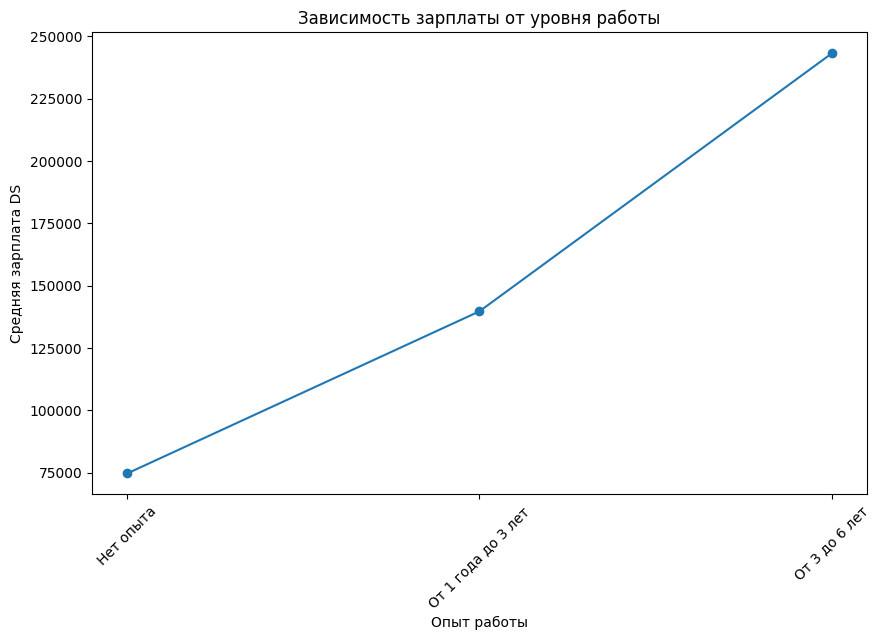

In [ ]:
# Построение визуализации для зависимости зарплаты и опыта работы

plt.figure(figsize=(10, 6))
plt.plot(df_v['experience'], df_v['avg_salary'], marker='o')
plt.title('Зависимость зарплаты от уровня работы')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя зарплата DS')
plt.xticks(rotation=45)  

fig.write_html("C:\IDE\Project 2\Plotly\histogram_2.html")
plt.show()

C:\Users\DS\AppData\Local\Temp\ipykernel_14508\2443125943.py:9: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



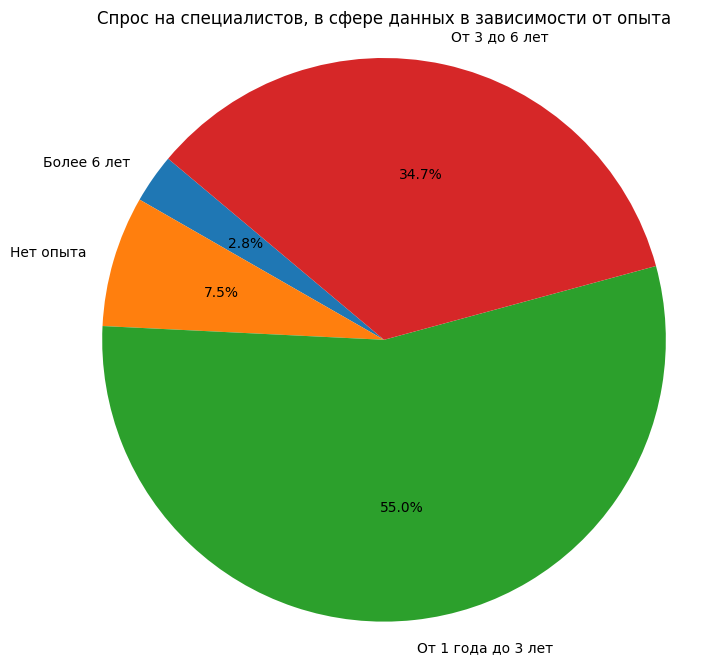

In [51]:
query = f'''select 
distinct(v.experience),                                          -- вывести виды опыта
count (v.id) as vacancies                                        -- посчитать количество вакансий к ним
from public.vacancies v
where lower(v.name) like '%data%' or lower(v.name) like '%данн%'
GROUP BY v.experience                                           -- группировка по опыту
order by v.experience                                           -- сортировка по опыту
'''
df = pd.read_sql_query(query, connection)

# построение круговой диаграммы для демонстрации распределения вакансий согласно опыта

plt.figure(figsize=(8, 8))
plt.pie(df['vacancies'], labels=df['experience'], autopct='%1.1f%%', startangle=140)
plt.title ('Спрос на специалистов, в сфере данных в зависимости от опыта')
plt.axis('equal')

fig.write_html("C:\IDE\Project 2\Plotly\pie_1.html")           # записать график в папку Плотли
plt.show()

C:\Users\DS\AppData\Local\Temp\ipykernel_17040\3662237103.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



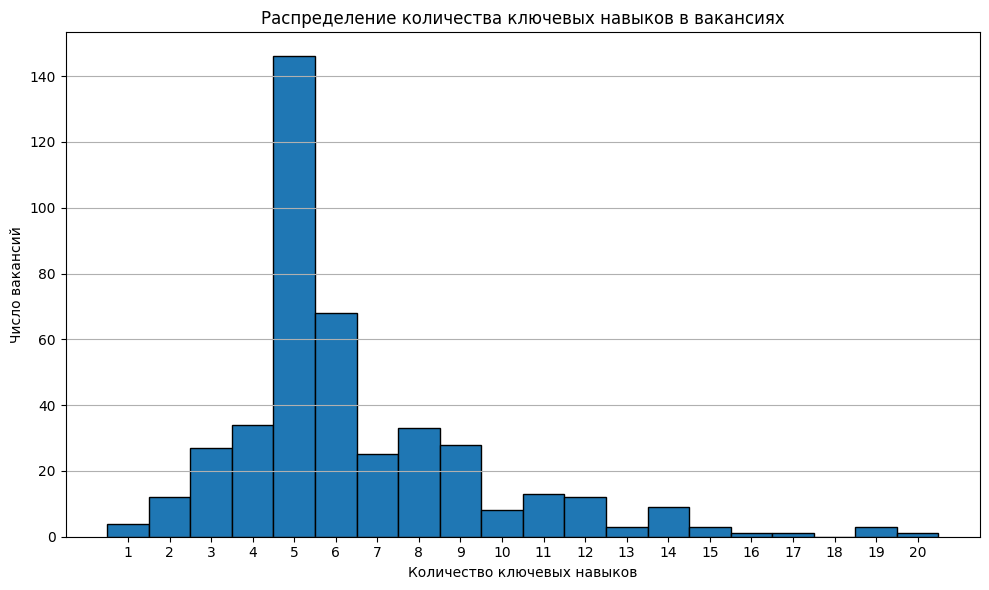

In [16]:

import pandas as pd
import matplotlib.pyplot as plt

# запрос для графика

query = '''
SELECT
    length(key_skills) - length(replace(key_skills, CHR(9), '')) + 1 AS skill_count            ---посчитать количество табуляций и прибавить 1 чтобы узнать количество навков
FROM vacancies v
WHERE  
    (v.name ILIKE '%data scientist%'                                                          -- условия по которому вакансия ассоциируется с DS
    OR lower(v.name) ILIKE '%data science%'
    OR v.name ILIKE '%исследователь данных%'
    OR (v.name LIKE '%ML%' AND (v.name NOT ILIKE '%html%'))
    OR v.name ILIKE '%machine learning%'
    OR v.name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)                                                             -- убрать из расчета вакансии, которые содержат ноль навыков
'''

df = pd.read_sql_query(query, connection)

# Построение гистограммы, отражающей распределение навыков

plt.figure(figsize=(10, 6))
plt.hist(df['skill_count'], bins=range(1, df['skill_count'].max() + 2), align='left', edgecolor='black')
plt.title('Распределение количества ключевых навыков в вакансиях')
plt.xlabel('Количество ключевых навыков')
plt.ylabel('Число вакансий')
plt.xticks(range(1, df['skill_count'].max() + 1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()
fig.write_html("C:\IDE\Project 2\Plotly\gist_2.html")  

In [ ]:
# не забываем закрыть соединение после окончания работы
connection.close()